**Polynomial Regression**

Not all relationships are linear.

* Linear formula/ first order polynomial, as the the power of x is 1:
    
    y = mx + b

* Second order Polynomial:

    y = ax² + bx + x


* Third order Polynomial:

    y = ax³ + bx² + cx + d


* Fourth order Polynomial:

    y = ax⁴ + bx³ + cx² + dx + e

    
Higher orders produce more complex curves.


In Python, we can use the library numpy.polyfit()

Example 1:
Let's fabricate some data that shows a polynomial relationship between page speed and amount purchased

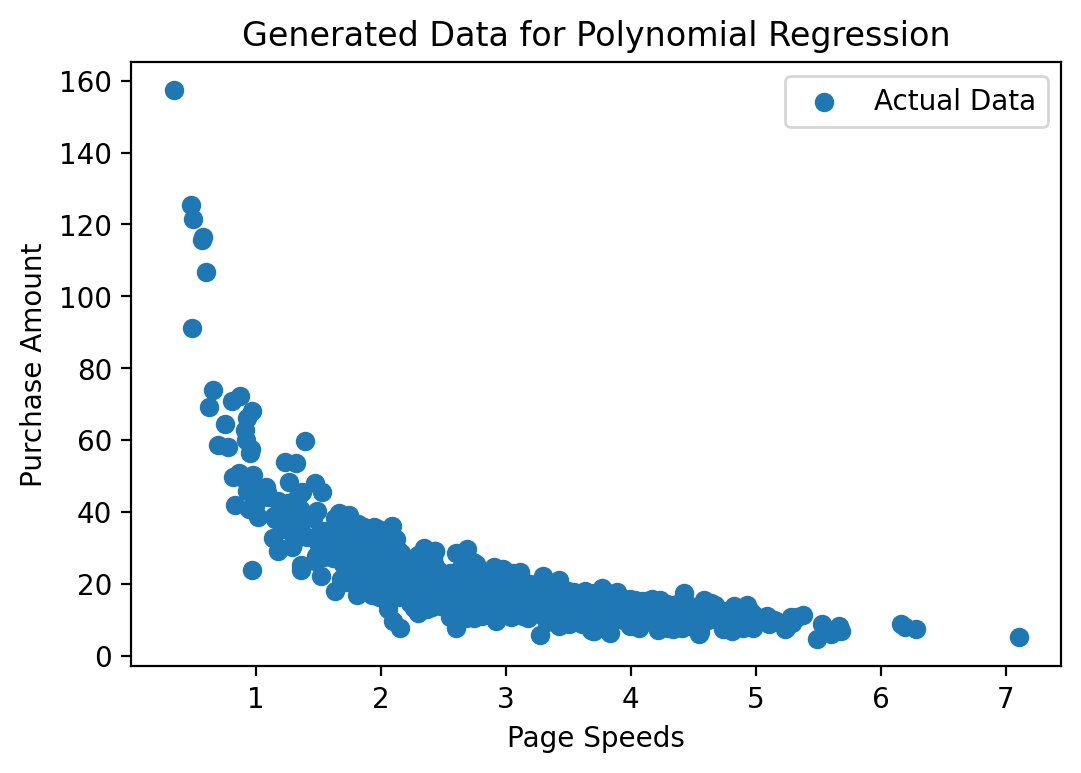

In [1]:
from pylab import *
import numpy as np

np.random.seed(2) # using same seed will yield the same set of random numbers
pageSpeeds = np.random.normal(3.0, 1.0, 1000) # generate 1000 random data points with mean (loc) of 3.0 and a std deviation (scale) of 1.0
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds # generate 1000 random data points with mean (loc) of 50.0 and a std deviation (scale) of 10.0. The division introduces a correlation/ relationship between page speeds and purchase amount and it implies that users with faster page speeds tend to make larger purchases.

plt.figure(dpi=200)
plt.scatter(pageSpeeds, purchaseAmount, label="Actual Data")
plt.xlabel('Page Speeds')
plt.ylabel('Purchase Amount')
plt.title('Generated Data for Polynomial Regression')
plt.legend()

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds) # Converts the pageSpeeds array (simulated page speeds) into a NumPy array named x
y = np.array(purchaseAmount) # Converts the purchaseAmount array (simulated purchase amounts) into a NumPy array named y

p4 = np.poly1d(np.polyfit(x, y, 4))
print(p4)

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


    np.polyfit(x, y, 4):

Performs polynomial fitting to the data using the least squares method. It fits a polynomial of degree 4 to the data, where <code>x</code> represents the independent variable (page speeds) and <code>y</code> represents the dependent variable (purchase amounts).

The parameters are:
* <code>x</code>: The independent variable (page speeds).
* <code>y</code>: The dependent variable (purchase amounts).
* <code>4</code>: The degree of the polynomial to fit (degree 4 in this case).

    np.poly1d(...):
* Constructs a one-dimensional polynomial class from the coefficients obtained by the polynomial fitting.
* <code>p4</code> becomes an instance of the <code>numpy.poly1d</code> class, representing the polynomial function of degree 4.

In summary, the code fits a polynomial of degree 4 to the relationship between <code>pageSpeeds</code> and <code>purchaseAmount </code>using the least squares method. The resulting polynomial function <code>p4</code> can be used to make predictions or visualize the fitted curve. The choice of the degree of the polynomial affects the flexibility and complexity of the fitted curve.

Let's visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

xp values:
[0.         0.07070707 0.14141414 0.21212121 0.28282828 0.35353535
 0.42424242 0.49494949 0.56565657 0.63636364 0.70707071 0.77777778
 0.84848485 0.91919192 0.98989899 1.06060606 1.13131313 1.2020202
 1.27272727 1.34343434 1.41414141 1.48484848 1.55555556 1.62626263
 1.6969697  1.76767677 1.83838384 1.90909091 1.97979798 2.05050505
 2.12121212 2.19191919 2.26262626 2.33333333 2.4040404  2.47474747
 2.54545455 2.61616162 2.68686869 2.75757576 2.82828283 2.8989899
 2.96969697 3.04040404 3.11111111 3.18181818 3.25252525 3.32323232
 3.39393939 3.46464646 3.53535354 3.60606061 3.67676768 3.74747475
 3.81818182 3.88888889 3.95959596 4.03030303 4.1010101  4.17171717
 4.24242424 4.31313131 4.38383838 4.45454545 4.52525253 4.5959596
 4.66666667 4.73737374 4.80808081 4.87878788 4.94949495 5.02020202
 5.09090909 5.16161616 5.23232323 5.3030303  5.37373737 5.44444444
 5.51515152 5.58585859 5.65656566 5.72727273 5.7979798  5.86868687
 5.93939394 6.01010101 6.08080808 6.15151515 6.2222222

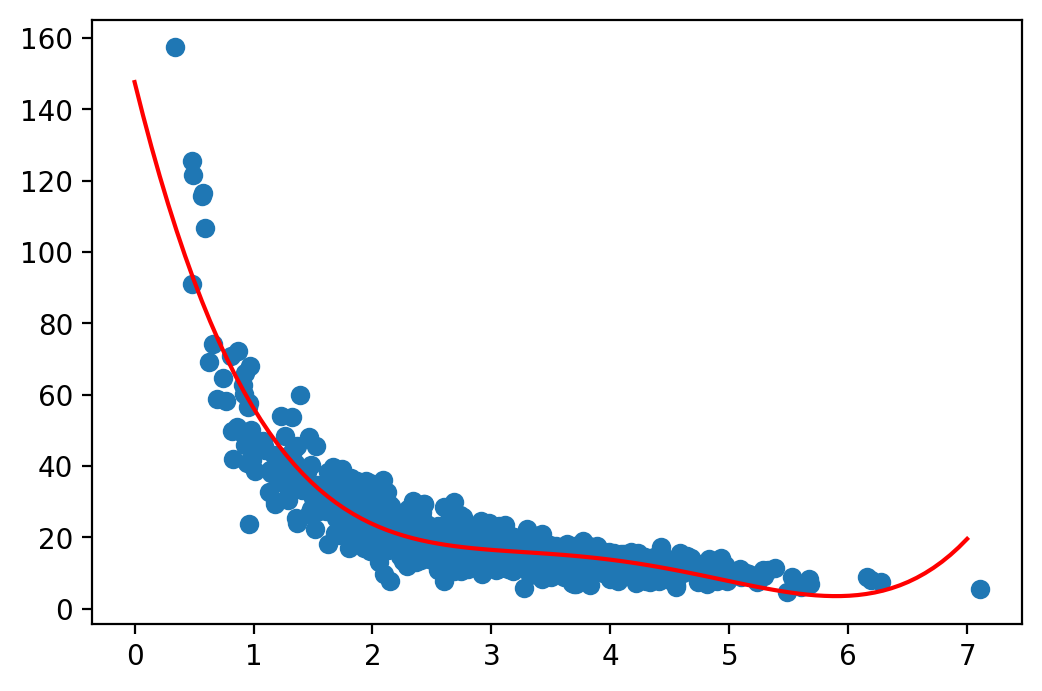

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100) # xp is an array of x-values generated by an array of 100 evenly spaced values between 0 and 7
print(f"xp values:\n{xp}\n") # These values are used to evaluate the fitted polynomial function.

yp = p4(xp) # yp is an array of y-values generated by the evaluation of the polynomial function p4(xp) given by the array xp
print(f"yp values of polynomial function: 0.5401 x4 - 8.856 x3 + 52.25 x2 - 135.3 x + 147.6\n{yp}")

plt.figure(dpi=200)
plt.scatter(x, y)
plt.plot(xp, yp, color='red') # plots the fitted polynomial curve 
# plt.plot(xp, p4(xp), color='red') # plots the fitted polynomial curve 
plt.show()

Below is the manual calculation of the polynomial function <code>y = 0.5401 x⁴ - 8.856 x³ + 52.25 x² - 135.3 x + 147.6</code> just for verification purpose:

In [4]:
# y = 0.5401 x4 - 8.856 x3 + 52.25 x2 - 135.3 x + 147.6
print(0.5401*(pow(xp[0],4)))
print(8.856*(pow(xp[0], 3)))
print(52.25*(pow(xp[0], 2)))
print(135.3*(pow(xp[0], 1)))
print(f"y-value for xp value of {xp[0]}: {0.5401*(pow(xp[0],4)) - 8.856*(pow(xp[0], 3)) + 52.25*(pow(xp[0], 2)) - 135.3*(pow(xp[0], 1)) + 147.6}")

0.0
0.0
0.0
0.0
y-value for xp value of 0.0: 147.6


In [5]:
print(f"{0.5401*(pow(xp[1],4)):.10f}")
print(8.856*(pow(xp[1], 3)))
print(52.25*(pow(xp[1], 2)))
print(135.3*(pow(xp[1], 1)))
print(f"y-value for xp value of {xp[1]:.4}: {0.5401*(pow(xp[1],4)) - 8.856*(pow(xp[1], 3)) + 52.25*(pow(xp[1], 2)) - 135.3*(pow(xp[1], 1)) + 147.6}")

0.0000134997
0.003130589642986337
0.26122334455667784
9.566666666666666
y-value for xp value of 0.07071: 138.29143958799182


Now, measure the r² value:

In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


Example 2:

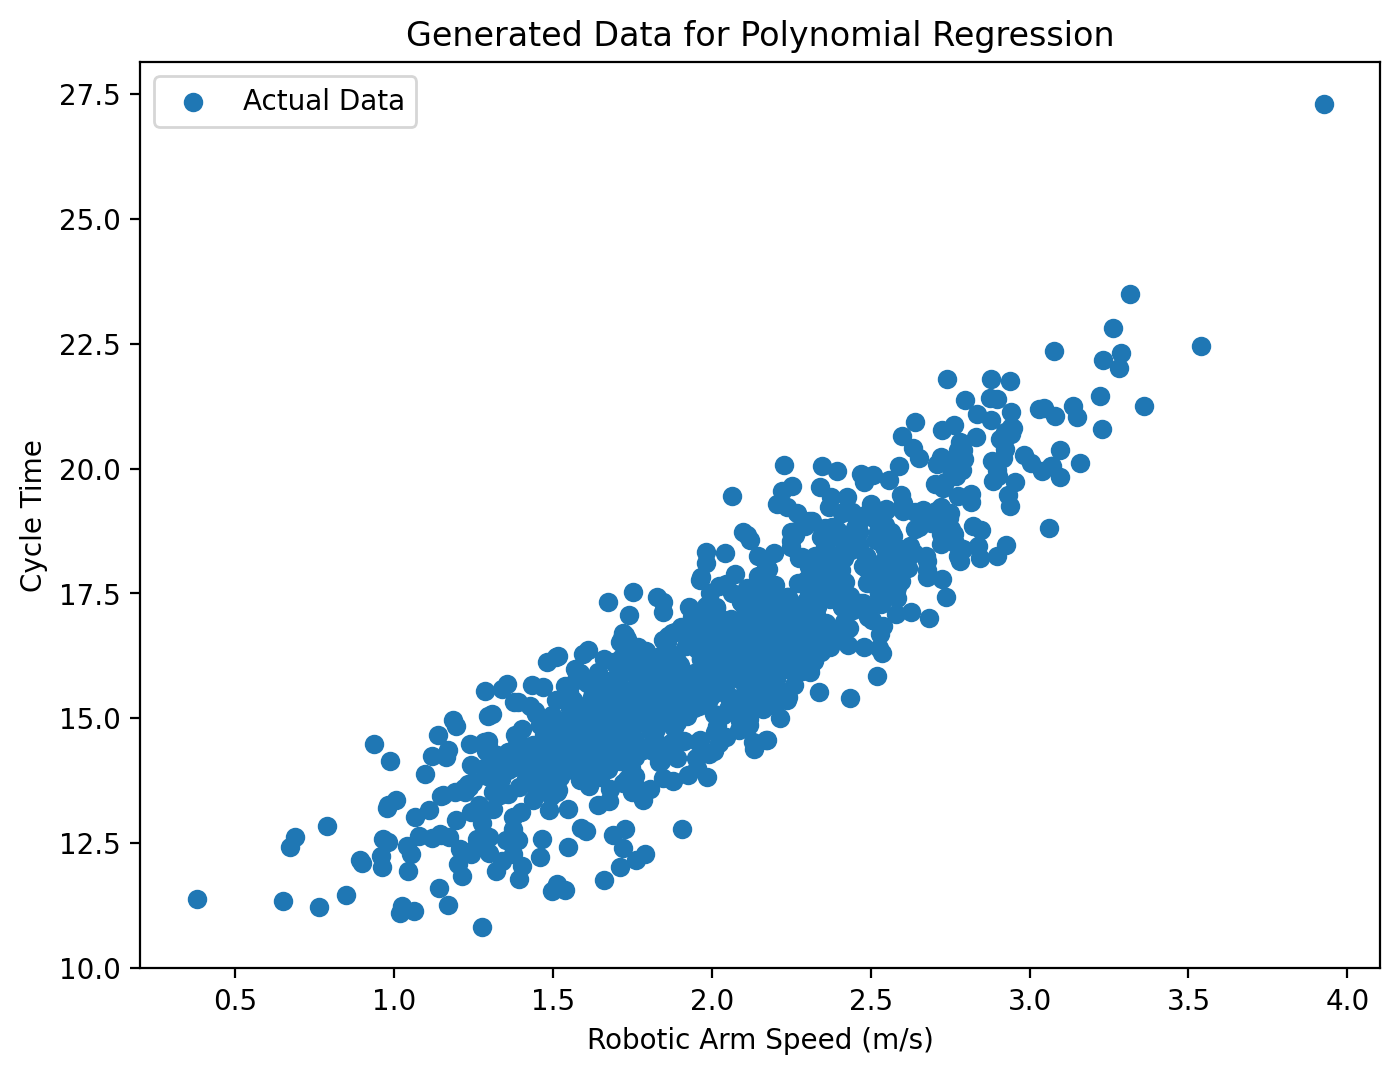

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for industrial automation and robotics
np.random.seed(42)
robotic_arm_speeds = np.random.normal(2.0, 0.5, 1000)
noise = np.random.normal(0, 1, 1000)
cycle_time = 10 + 2 * robotic_arm_speeds + 0.5 * robotic_arm_speeds**2 + noise

# Plot the generated data
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(robotic_arm_speeds, cycle_time, label="Actual Data")
plt.xlabel('Robotic Arm Speed (m/s)')
plt.ylabel('Cycle Time')
plt.title('Generated Data for Polynomial Regression')
plt.legend()
plt.show()


In [8]:
x = np.array(robotic_arm_speeds) # Converts the robotic arm speeds array into a NumPy array named x
y = np.array(cycle_time) # Converts the cycle time array into a NumPy array named y

p4 = np.poly1d(np.polyfit(x, y, 4))
print(p4)


         4          3         2
0.08248 x - 0.6428 x + 2.329 x - 0.3466 x + 11.27


xp values:
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.4444

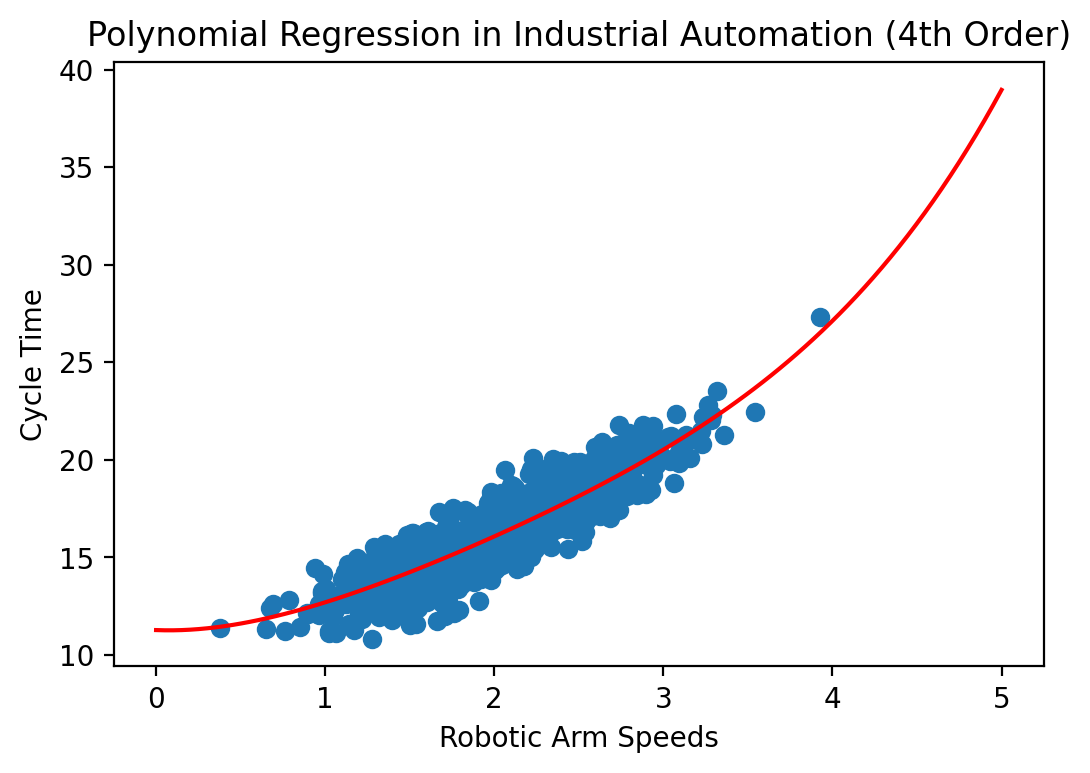

In [9]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 5, 100) # xp is an array of x-values generated by an array of 100 evenly spaced values between 0 and 4
print(f"xp values:\n{xp}\n") # These values are used to evaluate the fitted polynomial function.

yp = p4(xp) # yp is an array of y-values generated by the evaluation of the polynomial function p4(xp) given by the array xp
print(f"yp values:\n{yp}\n") # These values are used to evaluate the fitted polynomial function.

plt.figure(dpi=200)
plt.scatter(x, y)
plt.plot(xp, yp, color='red') # plots the fitted polynomial curve 
plt.xlabel('Robotic Arm Speeds')
plt.ylabel('Cycle Time')
plt.title('Polynomial Regression in Industrial Automation (4th Order)')
plt.show()


In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.7927485445074666


**Example 3 (from ChatGPT):**

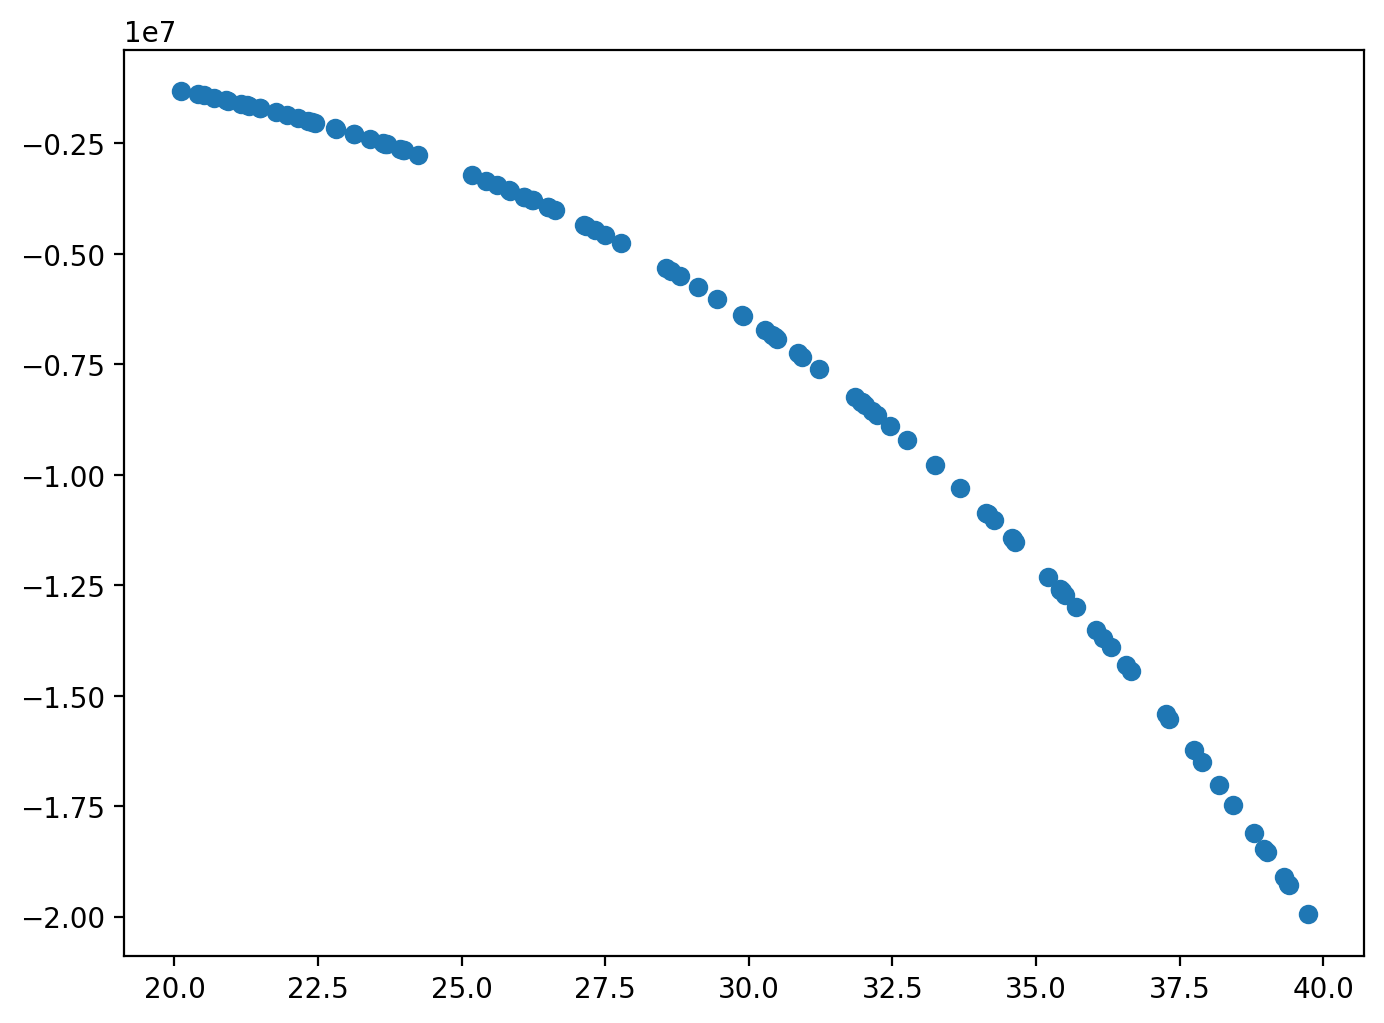

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more realistic synthetic data for industrial automation and robotics
np.random.seed(42)
temperature = np.random.uniform(20, 40, 100)
noise = np.random.normal(0, 10, 100)
efficiency = 300 - 8 * temperature**4 + noise

# Plot the generated data
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(temperature, efficiency)


        4          3         2
-8.001 x + 0.1499 x - 6.357 x + 116.1 x - 467.5


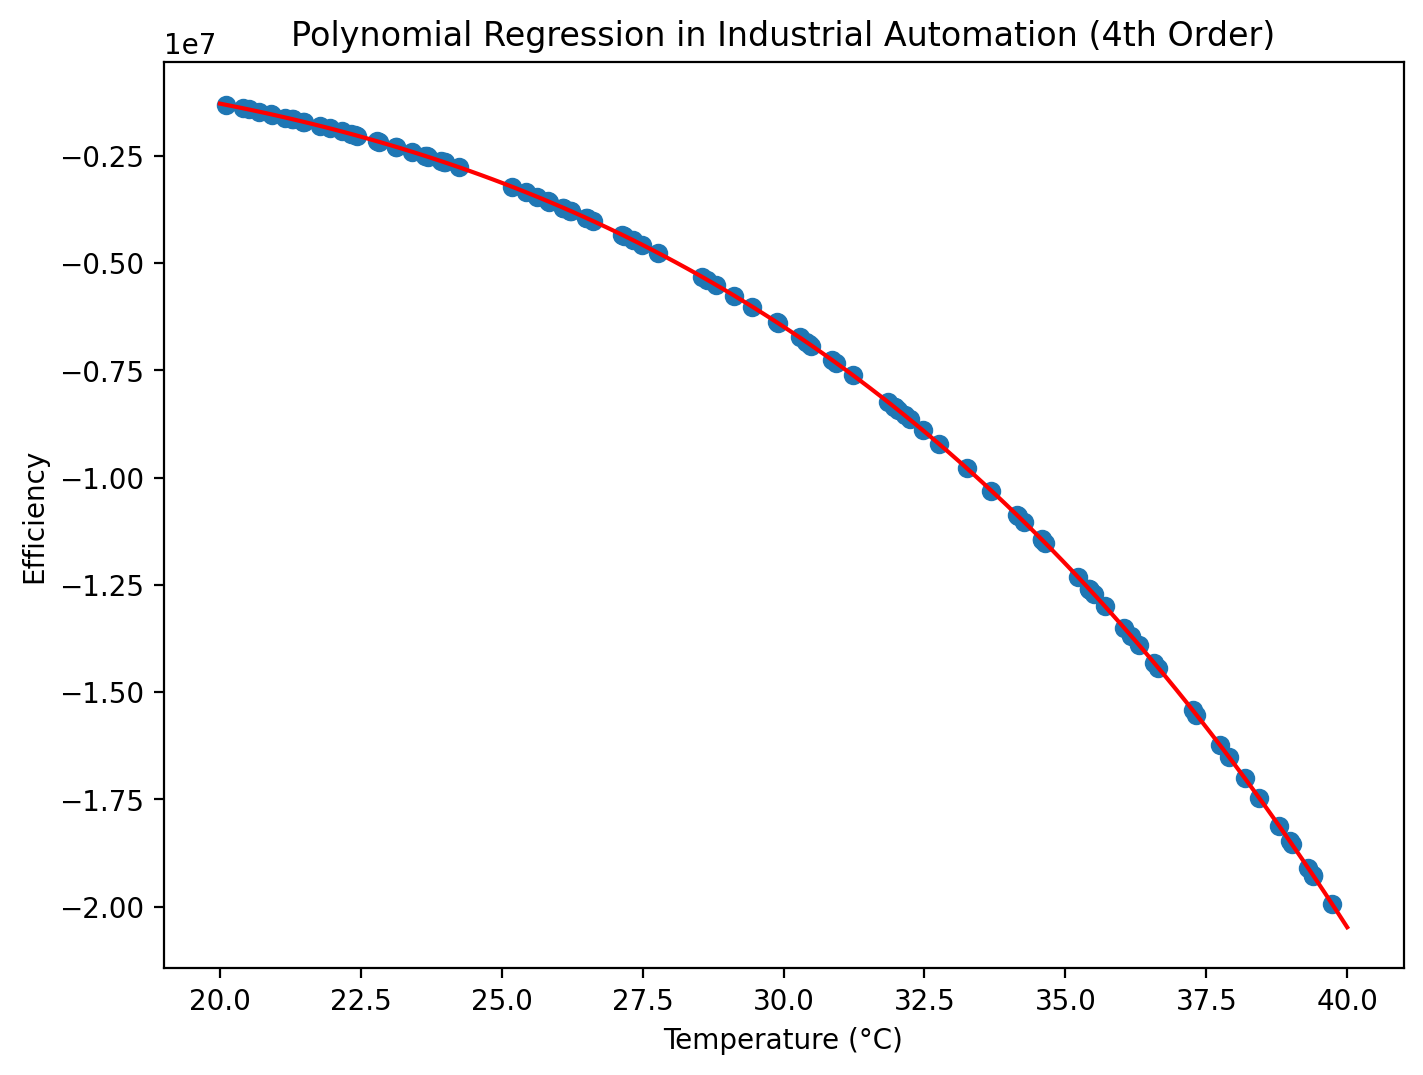

In [12]:
# Convert the data into numpy arrays
x = np.array(temperature)
y = np.array(efficiency)

# Construct a 4th-degree polynomial model that minimizes squared error
p4 = np.poly1d(np.polyfit(x, y, 4))
print(p4)

# Visualize the original scatter plot with a plot of predicted values
xp = np.linspace(20, 40, 100)
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(x, y)
plt.plot(xp, p4(xp), color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Efficiency')
plt.title('Polynomial Regression in Industrial Automation (4th Order)')
plt.show()


In [13]:
from sklearn.metrics import r2_score

# Calculate R² error
r2 = r2_score(y, p4(x))
print(f'R² Score: {r2:.4f}')

R² Score: 1.0000
